In [1]:
from mylib.statistic_test import *

code_id = "0881 - Maze 1m Results"
loc = join(figpath, "Dsp", code_id)
mkdir(loc)
pass

d:\Softwares\Anaconda2025\envs\maze\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        D:\Data\FinalResults\Dsp\0881 - Maze 1m Results is already existed!


# PVC

In [3]:
def _pvc(ratemap1, ratemap2):
    pvc = np.zeros(111)
    for i in range(111):
        b = CP_DSPs[4][0][i]-1
        pvc[i] = np.corrcoef(ratemap1[:, b], ratemap2[:, b])[0, 1]
        
    idx = np.where(np.isnan(pvc) == False)[0]
    pvc[idx] = np.convolve(pvc[idx], np.ones(5)/5, mode='same')
        
    return pvc

def calc_pvc(trace):
    if 'node 15' in trace.keys():
        pvc = np.zeros((13, 111))
        routes = np.array([1, 2, 3, 7, 0, 4, 5, 6, 0, 8, 9, 10, 0])
        
        for i in range(1, 6):
            pvc[i-1, :] = _pvc(trace['node 0']['old_map_clear'], trace[f'node {i}']['old_map_clear'])

        for i in range(7, 11):
            pvc[i-2, :] = _pvc(trace['node 6']['old_map_clear'], trace[f'node {i}']['old_map_clear'])
        
        for i in range(12, 16):
            pvc[i-3, :] = _pvc(trace['node 11']['old_map_clear'], trace[f'node {i}']['old_map_clear'])
            
    else:
        pvc = np.zeros((9, 111))
        routes = np.array([1, 2, 3, 7, 0, 4, 5, 6, 0])
        
        for i in range(1, 6):
            pvc[i-1, :] = _pvc(trace['node 0']['old_map_clear'], trace[f'node {i}']['old_map_clear'])
        
        for i in range(7, 11):
            pvc[i-2, :] = _pvc(trace['node 6']['old_map_clear'], trace[f'node {i}']['old_map_clear'])
            
    return pvc, routes

if exists(join(figdata, f"{code_id} [PVC].pkl")) == False:
    PVCData = {
        "MiceID": [],
        "Session": [],
        "Bin": [],
        "PVC": [],
        "Route": []
    }
    
    for mouse in [10266]:
        file_idx = np.where(f2['MiceID'] == mouse)[0]
        
        print(f"{mouse}:")
        for s, idx in tqdm(enumerate(file_idx)):
            
            with open(f2['Trace File'][idx], 'rb') as f:
                trace = pickle.load(f)
            pvc, routes = calc_pvc(trace)
            bins = np.tile(np.arange(1, 112), (pvc.shape[0], 1))
            routes = np.tile(routes[:, np.newaxis], (1, pvc.shape[1]))
            mices = np.full(pvc.size, mouse)
            sessions = np.full(pvc.size, s)
            
            PVCData['MiceID'].append(mices.flatten())
            PVCData['Session'].append(sessions.flatten())
            PVCData['PVC'].append(pvc.flatten())
            PVCData['Route'].append(routes.flatten())
            PVCData['Bin'].append(bins.flatten())
            
    for key in PVCData.keys():
        PVCData[key] = np.concatenate(PVCData[key])
        
    with open(join(figdata, f"{code_id} [PVC].pkl"), 'wb') as f:
        pickle.dump(PVCData, f)
        
    PVCD = pd.DataFrame(PVCData)
    PVCD.to_excel(join(figdata, f"{code_id} [PVC].xlsx"), index=False)
    print(len(PVCD))
else:
    with open(join(figdata, f"{code_id} [PVC].pkl"), 'rb') as f:
        PVCData = pickle.load(f)

subdata_0 = SubDict(PVCData, PVCData.keys(), np.where(PVCData['Route'] == 0)[0])
save_loc = join(loc, "PVC")
mkdir(save_loc)
for rt in range(1, 11):    
    subdata = SubDict(PVCData, PVCData.keys(), np.where(np.isin(PVCData['Route'], [rt]))[0])
    fig = plt.figure(figsize=(4, 3))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
    sns.lineplot(
        x='Bin', 
        y='PVC', 
        hue='Session',
        data=subdata,
        linewidth=0.5,
        palette="rainbow",
        err_kws={'edgecolor': None},
        legend=False,
        ax=ax
    )
    sns.lineplot(
        x='Bin', 
        y='PVC', 
        hue='Route',
        data=subdata_0,
        linewidth=0.5,
        palette=[DSPPalette[0]],
        err_kws={'edgecolor': None},
        legend=False,
        ax=ax
    )
    ax.set_xlim(0, 112.5)
    ax.set_xticks(np.linspace(0, 112.5, 10), np.linspace(0, 9, 10))
    ax.set_ylim(-0.1, 0.9)
    ax.set_yticks(np.linspace(-0.1, 0.9, 6))
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    ax.set
    ax.set_title(f"Route {rt+1}")
    plt.savefig(join(save_loc, f"R{rt+1}.png"), dpi=600)
    plt.savefig(join(save_loc, f"R{rt+1}.svg"), dpi=600)
    plt.close()


10266:


11it [00:24,  2.19s/it]


13209
        D:\Data\FinalResults\Dsp\0881 - Maze 1m Results\PVC is made up successfully!


# Lapwise Correlation

File 1


d:\Softwares\Anaconda2025\envs\maze\Lib\site-packages\mazepy\datastruc\neuact.py:1123: RuntimeWarning: invalid value encountered in divide
  firing_rate = spike_counts/(occu_time/1000)
100%|██████████| 114/114 [00:04<00:00, 23.23it/s]


File 2


100%|██████████| 121/121 [00:05<00:00, 21.24it/s]


File 3


100%|██████████| 114/114 [00:04<00:00, 23.16it/s]


File 4


100%|██████████| 123/123 [00:05<00:00, 21.99it/s]


File 5


100%|██████████| 122/122 [00:05<00:00, 23.73it/s]


File 6


100%|██████████| 123/123 [00:04<00:00, 26.22it/s]


File 7


100%|██████████| 163/163 [00:10<00:00, 14.95it/s]


File 8


100%|██████████| 159/159 [00:11<00:00, 13.32it/s]


File 9


100%|██████████| 160/160 [00:12<00:00, 12.78it/s]


File 10


100%|██████████| 161/161 [00:12<00:00, 13.41it/s]


File 11


100%|██████████| 161/161 [00:11<00:00, 13.59it/s]


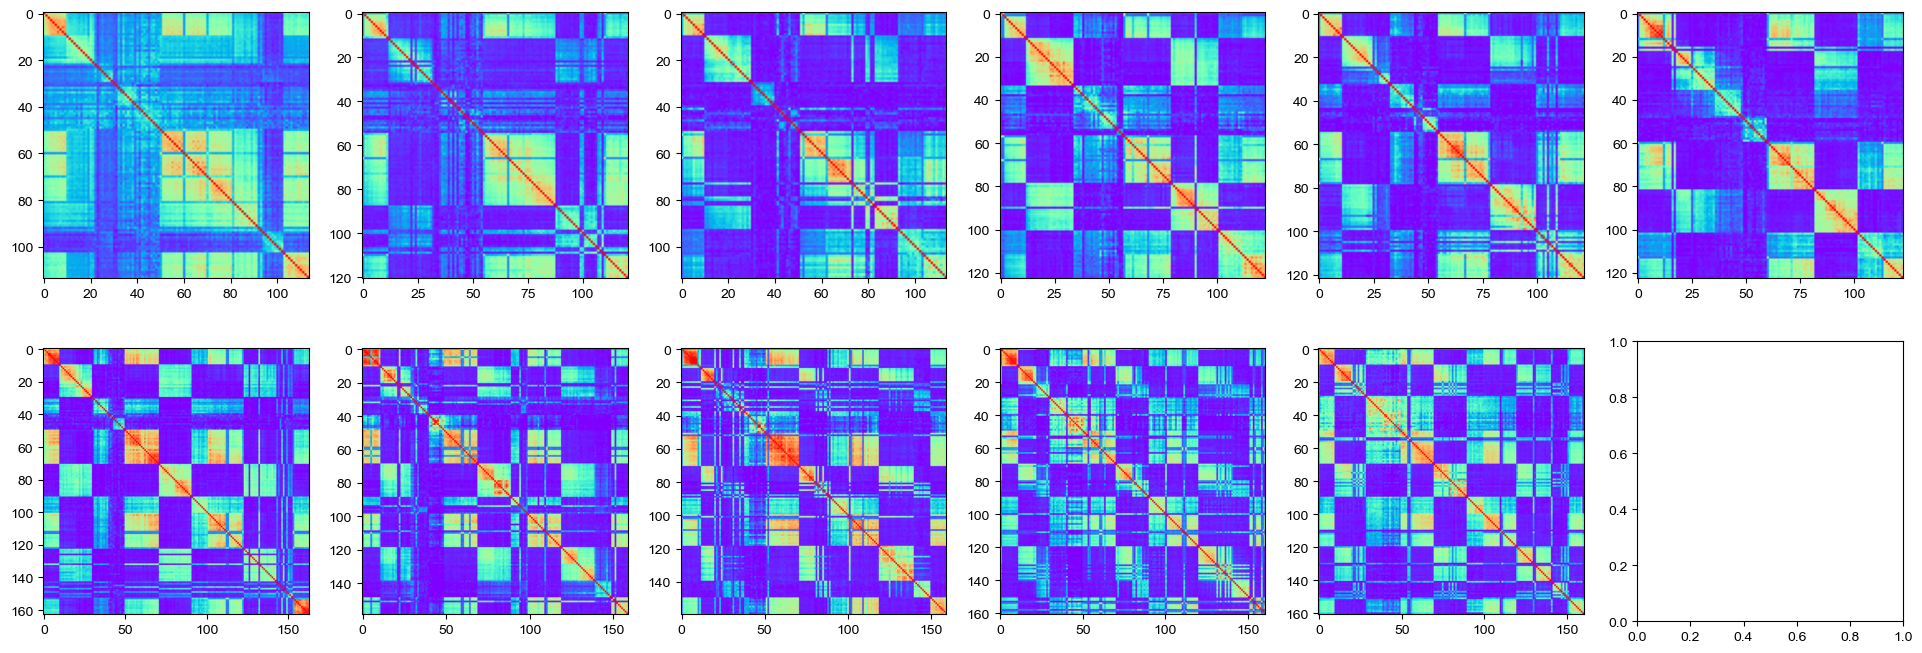

In [24]:
from mazepy.datastruc.neuact import SpikeTrain
from mazepy.datastruc.variables import VariableBin

def get_lapwise_ratemap(trace: dict, is_cutted: bool = True):    
    maze_type = trace['maze_type']
    beg_time, end_time = trace['lap beg time'], trace['lap end time']
    beg_idx = np.array([np.where(trace['correct_time'] >= beg_time[i])[0][0] for i in range(beg_time.shape[0])])
    routes = classify_lap(spike_nodes_transform(trace['correct_nodes'], 12), beg_idx, maze_type)
    smoothed_map = np.zeros((trace['n_neuron'], 144, beg_idx.shape[0]), dtype = np.float64)
    
    for i in range(beg_idx.shape[0]):
        
        spike_idx = np.where(
            (trace['ms_time'] >= beg_time[i]) & (trace['ms_time'] <= end_time[i]) &
            (np.isnan(trace['spike_nodes_original']) == False)
        )[0]
        
        spike_nodes = spike_nodes_transform(trace['spike_nodes_original'][spike_idx].astype(np.int64), 12)-1
        Spikes = trace['Spikes_original'][:, spike_idx]
        
        spike_train = SpikeTrain(
            activity=Spikes,
            time=trace['ms_time'][spike_idx],
            variable=VariableBin(spike_nodes)
        )
        
        rate_map = spike_train.calc_tuning_curve(144, t_interv_limits=100)
        smoothed_map[:, :, i] = rate_map.to_array() #@ trace['Ms'].T

    X = np.transpose(smoothed_map, (2, 1, 0))
    return X, routes

file_idx = np.where(f2['MiceID'] == 10266)[0]
fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(4*6, 4*2))
for s, idx in enumerate(file_idx):
    with open(f2['Trace File'][idx], 'rb') as f:
        trace = pickle.load(f)
    
    print(f"File {s+1}")
    lap_ratemap, rts = get_lapwise_ratemap(trace, is_cutted=True)
    corr = np.zeros((lap_ratemap.shape[0], lap_ratemap.shape[0]))
    for i in tqdm(range(lap_ratemap.shape[0])):
        for j in range(i, lap_ratemap.shape[0]):
            intersected_bins = np.intersect1d(
                CP_DSPs[4][rts[i]], CP_DSPs[4][rts[j]]
            )
            corr[i, j] = np.corrcoef(lap_ratemap[i, intersected_bins-1, :].flatten(), lap_ratemap[j, intersected_bins-1, :].flatten())[0, 1]
            corr[j, i] = corr[i, j]
    ax: Axes = axes[s//6, s%6]
    ax.imshow(corr, vmin=0, vmax=0.5, cmap='rainbow')
plt.savefig(join(loc, "Lapwise Correlation Maze 1m.png"), dpi=2400)
plt.savefig(join(loc, "Lapwise Correlation Maze 1m.svg"), dpi=600)

# Decoding

In [ ]:
save_decode_loc = join(loc, "GNB Decoding")
mkdir(save_decode_loc)

def combine_groups(
    trace, profiles: list[tuple[int, int]], effect_route: int
):
    res = {
        "Effect on Route": [],
        "Bin": [],
        "Loss": [],
        "Type": []
    }
    maze_type = trace['maze_type']
    assert maze_type == 4
    D = GetDMatrices(maze_type, nx=48)
    
    types = ["R1_2_Rt", "Rp_2_Rt", "Rp_2_R1", "R1_2_Rp"]
    assert len(profiles) == len(types)
    for t, profile in enumerate(profiles):
        nb_model = NaiveBayesDecoder(maze_type=4, res=48, smooth_matrix=trace['Ms'])
        nb_model.fit(
            trace[f'node {profile[0]}']['Spikes'],
            trace[f'node {profile[0]}']['spike_nodes'].astype(np.int64)
        )
        y_test = trace[f'node {profile[1]}']['spike_nodes'].astype(np.int64)
        y_pred = nb_model.predict(trace[f'node {profile[1]}']['Spikes'], y_test)
        
        loss = D[(y_test-1, y_pred-1)]
        
        res['Effect on Route'].append(np.repeat(effect_route, y_test.shape[0]))
        res['Bin'].append(y_test)
        res['Loss'].append(loss)
        res['Type'].append(np.repeat(types[t], y_test.shape[0]))
        
    for key in res.keys():
        res[key] = np.concatenate(res[key])
        
    return res

def GNB_decoding(trace: dict):
    res = {
        "Effect on Route": [],
        "Bin": [],
        "Loss": [],
        "Type": []
    }
    # 0 1 2 3 4 5
    # 6 7 8 9 10
    # 11 12 13 14 15
    
    assert 'node 15' in trace.keys(), f"Node 15 not found in trace keys."
    
    print("  Test R5")
    res_rt = combine_groups(
        trace,
        profiles=[(6, 7), (12, 7), (12, 6), (6, 12)],
        effect_route=5
    )
    
    for key in res.keys():
        res[key].append(res_rt[key])    

    print("  \n\nTest R2")
    res_rt = combine_groups(
        trace,
        profiles=[(0, 1), (13, 1), (13, 0), (0, 13)],
        effect_route=2
    )
    
    for key in res.keys():
        res[key].append(res_rt[key])
    
    print("  \n\nTest R3")
    res_rt = combine_groups(
        trace,
        profiles=[(0, 2), (14, 2), (14, 0), (0, 14)],
        effect_route=3
    )
    
    for key in res.keys():
        res[key].append(res_rt[key])
    
    for key in res.keys():
        res[key] = np.concatenate(res[key])
        
    with open(join(save_decode_loc, f"{trace['date']}.pkl"), "wb") as f:
        pickle.dump(res, f)
        
    return res

for mouse in [10266]:
    file_idx = np.where((f2['MiceID'] == mouse)&(f2['date'] >= 20251221))[0]
    
    print(f"{mouse}:")
    for s, idx in tqdm(enumerate(file_idx)):
        print(f"Date {f2['date'][idx]}-----------------------")
        with open(f2['Trace File'][idx], 'rb') as f:
            trace = pickle.load(f)
        res = GNB_decoding(trace)
        print("Done. \n\n")

        D:\Data\FinalResults\Dsp\0881 - Maze 1m Results\GNB Decoding is already existed!
10266:


0it [00:00, ?it/s]

Date 20251221-----------------------


0it [00:01, ?it/s]

  Test R5


TypeError: 'int' object is not subscriptable

        D:\Data\FinalResults\Dsp\0881 - Maze 1m Results\GNB Decoding is already existed!


d:\Softwares\Anaconda2025\envs\maze\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<Axes: xlabel='Bin', ylabel='Loss'>

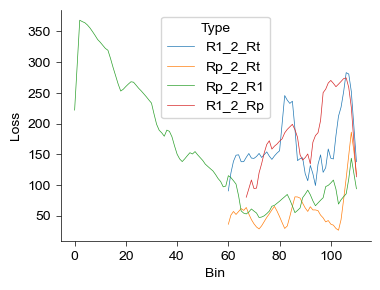

In [ ]:
save_decode_loc = join(loc, "GNB Decoding")
mkdir(save_decode_loc)

with open(join(save_decode_loc, f"20251225.pkl"), "rb") as f:
    res = pickle.load(f)
    
resort_res = {
    "Effect on Route": [],
    "Bin": [],
    "Loss": [],
    "Type": []
}
bins = spike_nodes_transform(res['Bin'], 12)
for effect in [2, 3, 5]:
    for tp in ["R1_2_Rt", "Rp_2_Rt", "Rp_2_R1", "R1_2_Rp", "Rt_2_R1", "Rt_2_Rp"]:
        idx = np.where((res['Effect on Route'] == effect)&(res['Type'] == tp))[0]
        avg_losses = np.zeros(len(CP_DSPs[4][0]))
        for i, b in enumerate(CP_DSPs[4][0]):
            bin_idx = np.where(bins[idx] == b)[0]
            avg_losses[i] = np.nanmedian(res['Loss'][idx][bin_idx])
        
        notnan_idx = np.where(np.isnan(avg_losses) == False)[0]
        avg_losses[notnan_idx] = np.convolve(
            avg_losses[notnan_idx],
            np.ones(5)/5,
            mode='same'
        )
        resort_res['Effect on Route'].append(np.repeat(effect, len(CP_DSPs[4][0])))
        resort_res['Bin'].append(np.arange(len(CP_DSPs[4][0])))
        resort_res['Loss'].append(avg_losses)
        resort_res['Type'].append(np.repeat(tp, len(CP_DSPs[4][0])))
for key in resort_res.keys():
    resort_res[key] = np.concatenate(resort_res[key])
    
idx = np.where(resort_res['Effect on Route'] == 3)[0]
D = GetDMatrices(4, 48)

fig = plt.figure(figsize=(4, 3))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
sns.lineplot(
    x='Bin',
    y='Loss',
    hue='Type',
    data=SubDict(resort_res, resort_res.keys(), idx),
    linewidth=0.5
)